# Dataset
O dataset é um conjunto de dados real de pedidos de manutenção de máquinas de uma fabricante multinacional de pneus.

## Dicionário de dados
### As colunas dos dados representam as seguintes informações:
* **n_nota** - Número da nota gerada ao solicitar uma manutenção.
* **consequencia** - Ao gerar uma nota, o colaborador tem que colocar uma consequência, que são divididas em 3 e significam:
  * 1 - Máquina parada;
  * 2 - Máquina com parada parcial;
  * 3 - Máquina em funcionamento.
* **n_ordem** - Número de ordem gerada pela equipe de manutenção, ao atender uma solicitação.
* **rank** - O rank é um input manual que a equipe de manutenção faz para categorizar o tempo necessário para e execução. Ele é dividido em A, B, C e D, que significam:
  * A - manutenções com duração maiores ou iguais à 240 minutos.
  * B - manutenções com duração entre 20 e 240 minutos.
  * C - manutenções com duração entre 0 e 20 minutos.
  * D - manutenção de máquinas específicas independente do tempo.
* **centro_custo** - Centro de custo de onde a solicitação de manutenção está sendo emitida, indica também onde a máquina sujeita a manutenção está localizada.
* **equipamento** - Indica o máquina que necessita de manutenção. Os nomes dos equipamentos foram alterados para manter o sigilo da empresa.
* **data_inicio** - A data em que foi aberta a solicitação de manutenção.
* **hora_inicio** - A hora que a solicitação foi requisitada. 
* **hora_ordem** - Hora do início da manutenção
* **hora_fim** - O horário do fim da manutenção.
* **data_fim** - Data do fim da manutenção.
* **custo_de_pecas** - O custo da manutenção em Reais.
* **tempo_real** - O tempo que levou desde a solicitação até o fim da manutenção (hora_inicio - hora_fim)
* **tempo_manutenção** - O tempo que levou para ser realizada a manutenção a partir da chegada do técnico ao local (hora_ordem - hora_fim)


## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge  # noqa F401
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.utils.validation import check_is_fitted
from category_encoders import OneHotEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action="ignore", category=np.VisibleDeprecationWarning)
warnings.simplefilter(action="ignore", category= UserWarning)
warnings.simplefilter(action="ignore", category= pd.core.common.SettingWithCopyWarning)
warnings.simplefilter(action="ignore", category=FutureWarning)

## Dados
Realizando a leitura dos dados 

In [2]:
df = pd.read_csv(r"D:\Lucas2\Pós\Data Science\Estatística\Trabalho Final\dados.csv")

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,n_nota,consequencia,n_ordem,rank,centro_custo,equipamento,data_inicio,hora_inicio,hora_ordem,hora_fim,data_fim,custo_de_pecas,tempo_real,tempo_manutencao
0,0,0,1001950445,1,NaN,NaN,25B1112,Equipamento 1,2015-01-12,09:08:06,00:00:00,00:00:00,NaN,0.00,0.0,0.0
1,1,1,1001950446,1,5.000116e+09,NaN,25B1112,Equipamento 1,2015-01-12,09:10:07,10:17:52,00:00:00,NaN,0.00,0.0,0.0
2,2,2,1001950447,1,5.000116e+09,NaN,25B1112,Equipamento 1,2015-01-12,09:12:02,10:16:03,00:00:00,NaN,601.89,0.0,0.0
3,3,3,1001950448,1,NaN,NaN,25B1112,Equipamento 1,2015-01-12,09:12:48,00:00:00,00:00:00,NaN,0.00,0.0,0.0
4,4,4,1001950616,1,5.000116e+09,NaN,25B1112,Equipamento 1,2015-01-12,14:34:16,21:15:20,00:00:00,NaN,0.00,0.0,0.0


Verificando o número de NA's:

In [4]:
df.isna().sum()

Unnamed: 0              0
Unnamed: 0.1            0
n_nota                  0
consequencia            0
n_ordem             34956
rank                56742
centro_custo            1
equipamento             0
data_inicio             0
hora_inicio             0
hora_ordem              0
hora_fim                0
data_fim            47538
custo_de_pecas          0
tempo_real              0
tempo_manutencao        0
dtype: int64

Analisando as variáveis do dataset:

In [5]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,n_nota,consequencia,n_ordem,custo_de_pecas,tempo_real,tempo_manutencao
count,259534.000000,259534.000000,2.595340e+05,259534.000000,2.245780e+05,259534.000000,259534.000000,259534.000000
mean,129766.500000,129766.500000,1.002848e+09,1.574653,5.000238e+09,147.853444,81.237776,50.355905
std,74921.156719,74921.156719,4.463661e+05,0.891788,6.971077e+04,1224.174016,1932.582699,1810.054281
min,0.000000,0.000000,1.001950e+09,1.000000,5.000116e+09,-5052.870000,0.000000,0.000000
25%,64883.250000,64883.250000,1.002487e+09,1.000000,5.000177e+09,0.000000,8.600000,0.000000
50%,129766.500000,129766.500000,1.002910e+09,1.000000,5.000238e+09,0.000000,30.470000,7.680000
75%,194649.750000,194649.750000,1.003234e+09,3.000000,5.000298e+09,0.000000,75.050000,37.330000
max,259533.000000,259533.000000,1.003520e+09,8.000000,5.000357e+09,112617.080000,526030.950000,525942.820000


## Limpeza dos dados

### Exclusão de colunas e substituição dos tipos de dados. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259534 entries, 0 to 259533
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        259534 non-null  int64  
 1   Unnamed: 0.1      259534 non-null  int64  
 2   n_nota            259534 non-null  int64  
 3   consequencia      259534 non-null  int64  
 4   n_ordem           224578 non-null  float64
 5   rank              202792 non-null  object 
 6   centro_custo      259533 non-null  object 
 7   equipamento       259534 non-null  object 
 8   data_inicio       259534 non-null  object 
 9   hora_inicio       259534 non-null  object 
 10  hora_ordem        259534 non-null  object 
 11  hora_fim          259534 non-null  object 
 12  data_fim          211996 non-null  object 
 13  custo_de_pecas    259534 non-null  float64
 14  tempo_real        259534 non-null  float64
 15  tempo_manutencao  259534 non-null  float64
dtypes: float64(4), int64

Preenchendo os NaN's da coluna rank: 

In [7]:
df["rank"].fillna("Sem rank", inplace=True)

As colunas "Unnamed: 0" e "Unnamed: 0.1" não representam informações úteis, logo serão descartadas:

In [8]:
df.drop(columns=["Unnamed: 0", "Unnamed: 0.1"], inplace=True)

Transformando os valores "00:00:00" em NaN, uma vez que esse input é dado quando não há registro:

In [9]:
df[["hora_fim", "hora_ordem"]] = df[["hora_fim", "hora_ordem"]].replace({"00:00:00": np.NaN})

Transformando as colunas hora_ordem, data_inicio e data_fim em formato de datetime ("%Y-%m-%d %H:%M:S"):

In [10]:
df["hora_ordem"] = df["data_inicio"] + " " + df["hora_ordem"]
df["data_inicio"] = df["data_inicio"] + " " + df["hora_inicio"]
df["data_fim"] = df["data_fim"] + " " + df["hora_fim"]

In [11]:
df["data_fim"] =  df["data_fim"].apply(pd.to_datetime)
df["data_inicio"] = df["data_inicio"].astype("datetime64")
df["hora_ordem"] =  df["hora_ordem"].apply(pd.to_datetime)

Removendo as colunas "hora_inicio" e "hora_fim", uma vez que foram agregadas às colunas de data:

In [13]:
df.drop(columns=["hora_inicio", "hora_fim"], inplace=True)

In [14]:
df[["data_fim", "data_inicio", "hora_ordem"]].tail()

,data_fim,data_inicio,hora_ordem
259529,2022-08-01 15:25:00,2022-08-01 14:49:20,2022-08-01 14:50:12
259530,2022-08-01 22:25:00,2022-08-01 22:17:46,2022-08-01 22:29:47
259531,2022-08-01 09:00:00,2022-08-01 08:44:52,2022-08-01 08:47:58
259532,2022-08-01 14:00:00,2022-08-01 13:49:15,2022-08-01 14:20:31
259533,2022-08-01 10:15:00,2022-08-01 10:02:42,2022-08-01 10:07:05


# Análise

## Análise 1 - Identificar os 3 equipamentos que mais tiveram gasto de manutenção por ano.

In [15]:
df_custo_total = df.groupby([df["data_inicio"].dt.year, "equipamento"])["custo_de_pecas"].sum().to_frame().reset_index()

In [16]:
df_custo_total2 = pd.concat([df_custo_total[df_custo_total["data_inicio"] == 2015].sort_values("custo_de_pecas" ,ascending=False)[0:3],
                            df_custo_total[df_custo_total["data_inicio"] == 2016].sort_values("custo_de_pecas" ,ascending=False)[0:3],
                           df_custo_total[df_custo_total["data_inicio"] == 2017].sort_values("custo_de_pecas" ,ascending=False)[0:3],
                           df_custo_total[df_custo_total["data_inicio"] == 2018].sort_values("custo_de_pecas" ,ascending=False)[0:3],
                            df_custo_total[df_custo_total["data_inicio"] == 2019].sort_values("custo_de_pecas" ,ascending=False)[0:3],
                            df_custo_total[df_custo_total["data_inicio"] == 2020].sort_values("custo_de_pecas" ,ascending=False)[0:3],
                            df_custo_total[df_custo_total["data_inicio"] == 2021].sort_values("custo_de_pecas" ,ascending=False)[0:3]])

In [17]:
df_custo_total2["data_inicio"] = df_custo_total2["data_inicio"].astype(str)
df_custo_total2.rename(columns={"data_inicio": "Ano"}, inplace=True)

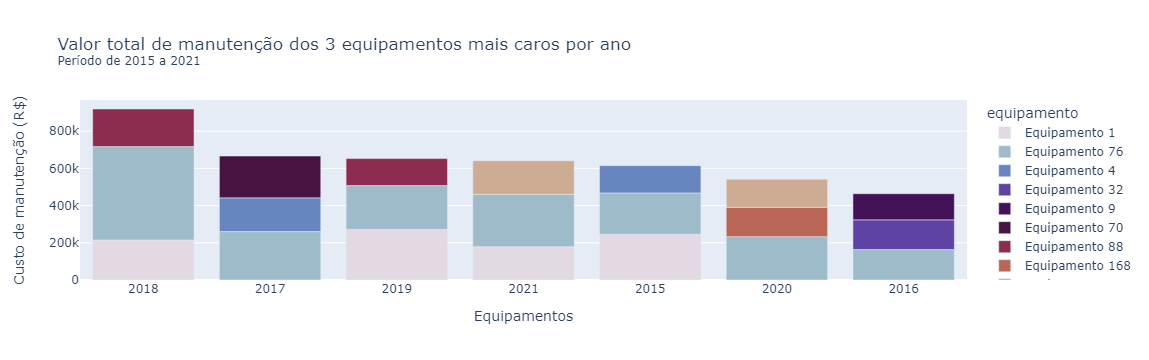

In [19]:
fig = px.bar(data_frame=df_custo_total2, x= "Ano", y= "custo_de_pecas", color="equipamento", title= "Valor total de manutenção dos 3 equipamentos mais caros por ano <br><sup>Período de 2015 a 2021</sup>", color_discrete_sequence=px.colors.cyclical.Twilight)
fig.update_layout(xaxis={'categoryorder':'total descending'}, xaxis_title="Equipamentos", yaxis_title="Custo de manutenção (R$)")
fig.show()

In [20]:
df_custo_total2

,Ano,equipamento,custo_de_pecas
0,2015,Equipamento 1,245904.30
127,2015,Equipamento 76,222361.68
87,2015,Equipamento 4,146215.07
300,2016,Equipamento 76,163844.88
252,2016,Equipamento 32,159379.97
315,2016,Equipamento 9,140408.77
498,2017,Equipamento 76,260261.45
492,2017,Equipamento 70,224412.43
458,2017,Equipamento 4,181417.65
699,2018,Equipamento 76,501842.15


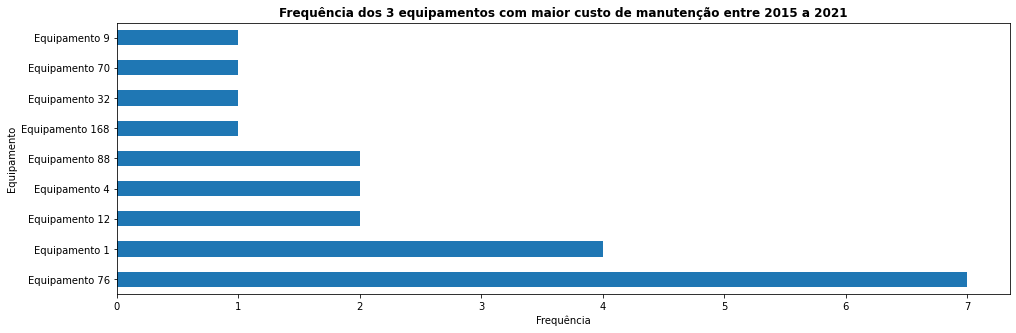

In [21]:
plt.figure(figsize=(16,5))
df_custo_total2.value_counts("equipamento").plot(kind="barh")
plt.title("Frequência dos 3 equipamentos com maior custo de manutenção entre 2015 a 2021",fontweight="bold")
plt.xlabel("Frequência")
plt.ylabel("Equipamento");

In [23]:
df_custo_total2["Ano"] = df_custo_total2["Ano"].astype(int)

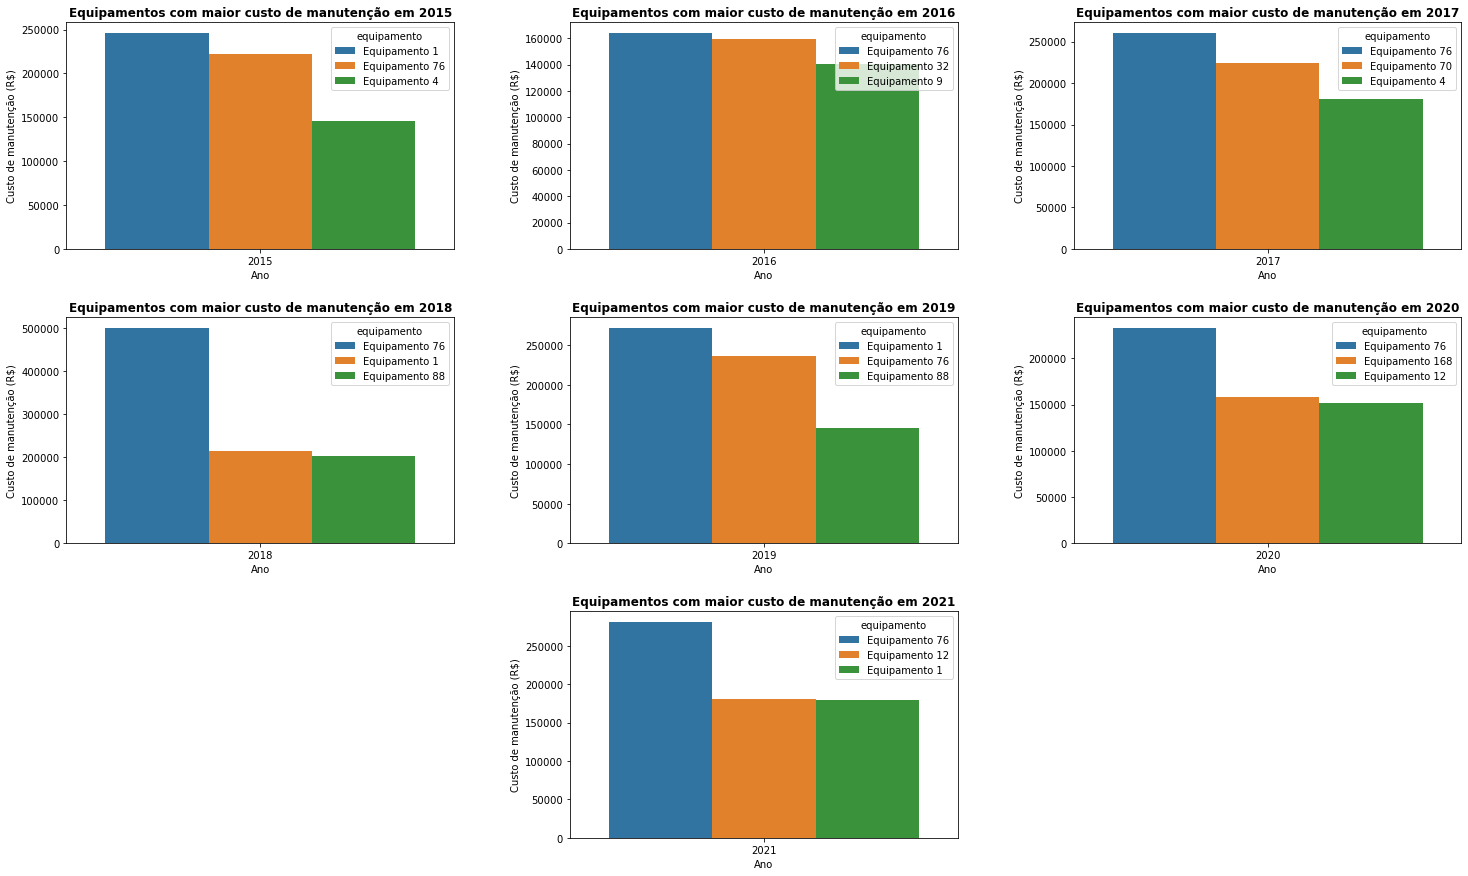

In [24]:
fig = plt.figure(figsize=(25, 15))
grid = plt.GridSpec(3, 3, hspace=0.3, wspace=0.3)

a2015 = fig.add_subplot(grid[0,0])
a2016 = fig.add_subplot(grid[0,1])
a2017 = fig.add_subplot(grid[0,2])
a2018 = fig.add_subplot(grid[1,0])
a2019 = fig.add_subplot(grid[1,1])
a2020 = fig.add_subplot(grid[1,2])
a2021 = fig.add_subplot(grid[2, 1])

# 2015
sns.barplot(x = 'Ano', y='custo_de_pecas', 
               hue = 'equipamento',data=df_custo_total2[df_custo_total2["Ano"] == 2015] ,ax=a2015)
a2015.set_xlabel("Ano")
a2015.set_ylabel("Custo de manutenção (R$)")
a2015.set_title("Equipamentos com maior custo de manutenção em 2015", fontweight="bold")

# 2016
sns.barplot(x = 'Ano', y='custo_de_pecas', 
               hue = 'equipamento',data=df_custo_total2[df_custo_total2["Ano"] == 2016] ,ax=a2016)
a2016.set_xlabel("Ano")
a2016.set_ylabel("Custo de manutenção (R$)")
a2016.set_title("Equipamentos com maior custo de manutenção em 2016", fontweight="bold")

# 2016
sns.barplot(x = 'Ano', y='custo_de_pecas', 
               hue = 'equipamento',data=df_custo_total2[df_custo_total2["Ano"] == 2017] ,ax=a2017)
a2017.set_xlabel("Ano")
a2017.set_ylabel("Custo de manutenção (R$)")
a2017.set_title("Equipamentos com maior custo de manutenção em 2017",fontweight="bold")

# 2016
sns.barplot(x = 'Ano', y='custo_de_pecas', 
               hue = 'equipamento',data=df_custo_total2[df_custo_total2["Ano"] == 2018] ,ax=a2018)
a2018.set_xlabel("Ano")
a2018.set_ylabel("Custo de manutenção (R$)")
a2018.set_title("Equipamentos com maior custo de manutenção em 2018",fontweight="bold")

# 2016
sns.barplot(x = 'Ano', y='custo_de_pecas', 
               hue = 'equipamento',data=df_custo_total2[df_custo_total2["Ano"] == 2019] ,ax=a2019)
a2019.set_xlabel("Ano")
a2019.set_ylabel("Custo de manutenção (R$)")
a2019.set_title("Equipamentos com maior custo de manutenção em 2019",fontweight="bold")

# 2016
sns.barplot(x = 'Ano', y='custo_de_pecas', 
               hue = 'equipamento',data=df_custo_total2[df_custo_total2["Ano"] == 2020] ,ax=a2020)
a2020.set_xlabel("Ano")
a2020.set_ylabel("Custo de manutenção (R$)")
a2020.set_title("Equipamentos com maior custo de manutenção em 2020",fontweight="bold")

# 2021
sns.barplot(x = 'Ano', y='custo_de_pecas', 
               hue = 'equipamento',data=df_custo_total2[df_custo_total2["Ano"] == 2021] ,ax=a2021)
a2021.set_xlabel("Ano")
a2021.set_ylabel("Custo de manutenção (R$)")
a2021.set_title("Equipamentos com maior custo de manutenção em 2021",fontweight="bold");

#### Essa análise permite observar os equipamentos mais custosos por ano, podendo então objetivamente tomar medidas afim de diminuir o custo de manutenção dos mesmos. Pode-se observar que os equipamentos 76 e 1 são os que mais necessitaram de dinheiro para manutenção, sendo que o equipamento 76 se manteve no top 3 de equipamentos mais custosos todos os anos analisados.

## Análise 2 - Três equipamentos que mais precisaram de manutenção por ano e sua relação com o custo gerado.

In [25]:
df_quebras_anuais = df.groupby([df["data_inicio"].dt.year, "equipamento"]).agg({"custo_de_pecas": "sum", "equipamento": "count"})

In [26]:
df_quebras_anuais[["custo_de_pecas", "total_quebras"]] = df_quebras_anuais[["custo_de_pecas", "equipamento"]]

In [27]:
df_quebras_anuais.drop(columns="equipamento", inplace= True)

In [28]:
df_quebras_anuais.reset_index(inplace=True)

In [29]:
df_quebras_anuais = pd.concat([df_quebras_anuais[df_quebras_anuais["data_inicio"] == 2015].sort_values("total_quebras" ,ascending=False)[0:3],
                            df_quebras_anuais[df_quebras_anuais["data_inicio"] == 2016].sort_values("total_quebras" ,ascending=False)[0:3],
                           df_quebras_anuais[df_quebras_anuais["data_inicio"] == 2017].sort_values("total_quebras" ,ascending=False)[0:3],
                           df_quebras_anuais[df_quebras_anuais["data_inicio"] == 2018].sort_values("total_quebras" ,ascending=False)[0:3],
                            df_quebras_anuais[df_quebras_anuais["data_inicio"] == 2019].sort_values("total_quebras" ,ascending=False)[0:3],
                            df_quebras_anuais[df_quebras_anuais["data_inicio"] == 2020].sort_values("custo_de_pecas" ,ascending=False)[0:3],
                            df_quebras_anuais[df_quebras_anuais["data_inicio"] == 2021].sort_values("total_quebras" ,ascending=False)[0:3]])

In [30]:
df_quebras_anuais["data_inicio"] = df_quebras_anuais["data_inicio"].astype(str)
df_quebras_anuais.rename(columns={"data_inicio": "Ano"}, inplace=True)

In [31]:
df_quebras_anuais

,Ano,equipamento,custo_de_pecas,total_quebras
0,2015,Equipamento 1,245904.30,851
127,2015,Equipamento 76,222361.68,782
76,2015,Equipamento 3,112417.21,653
300,2016,Equipamento 76,163844.88,548
153,2016,Equipamento 1,118430.79,525
190,2016,Equipamento 141,109268.60,521
498,2017,Equipamento 76,260261.45,677
355,2017,Equipamento 13,74909.52,608
494,2017,Equipamento 72,104526.83,596
699,2018,Equipamento 76,501842.15,811


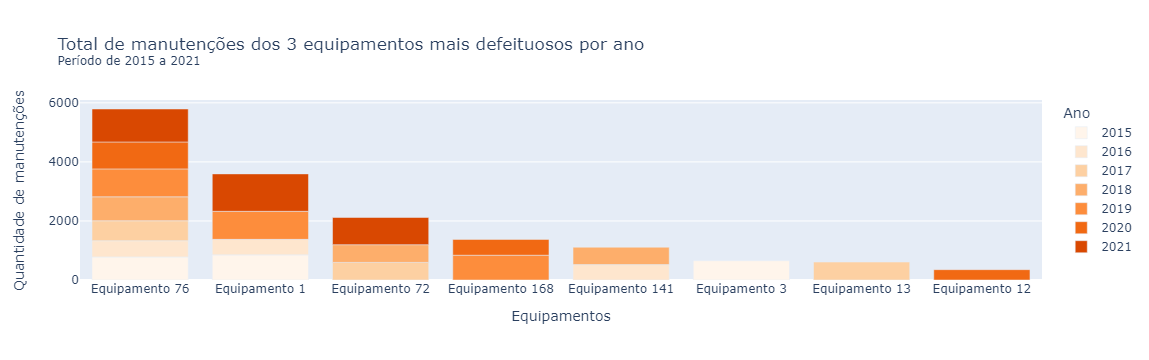

In [32]:
fig = px.bar(data_frame=df_quebras_anuais, x= "equipamento", y= "total_quebras", color="Ano", title= "Total de manutenções dos 3 equipamentos mais defeituosos por ano <br><sup>Período de 2015 a 2021</sup>", color_discrete_sequence=px.colors.sequential.Oranges)
fig.update_layout(xaxis={'categoryorder':'total descending'}, xaxis_title="Equipamentos", yaxis_title="Quantidade de manutenções")
fig.show()

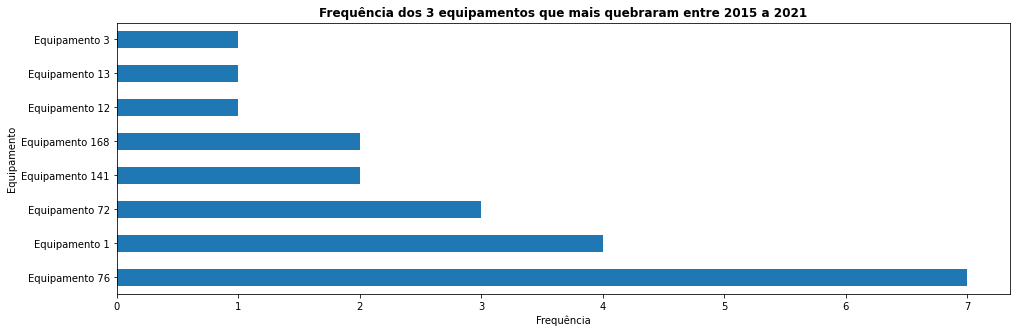

In [33]:
plt.figure(figsize=(16,5))
df_quebras_anuais.value_counts("equipamento").plot(kind="barh")
plt.title("Frequência dos 3 equipamentos que mais quebraram entre 2015 a 2021",fontweight="bold")
plt.xlabel("Frequência")
plt.ylabel("Equipamento");

#### Com base nas tabelas apresentadas, percebe-se que nem sempre os equipamentos que mais necessitam de manutenção são os mais custosos. Novamente, os equipamentos 76 e 1 aparecem liderando o número de manutenções anuais. 

## Análise 3 - O rank é um input manual, ou seja, o funcionário é responsável por calcular o tempo da manutenção e atribuir o rank devido. Considerando essa informação, qual é a taxa de acertividade da definição desse parâmetro?

Criação de função para criar uma nova coluna que atribui o rank corretor de forma automática, baseada no padrão definido pela empresa. Como o rank D é atribuido para máquinas específicas independente do tempo, ele foi desconsiderado para esta análise, uma vez que não possuímos a informação específica de quais máquinas seriam consideradas como rank D.

In [34]:
df_rank_automatico = df[df["rank"] != "D"]

In [35]:
def avaliador(x):
    a = None
    if 0 < x < 20:
        a = "C"
    elif 20 <= x < 240:
        a = "B"
    elif x >= 240:
        a = "A"
    elif x == 0:
        a = "Sem rank"
    return a

In [36]:
df_rank_automatico["rank_automatico"] = df["tempo_manutencao"].apply(avaliador)

In [37]:
pd.concat([df_rank_automatico["rank_automatico"].value_counts().sort_index(), df_rank_automatico["rank"].value_counts().sort_index()], axis=1)

,rank_automatico,rank
A,4932,3254
B,63846,87942
C,40160,47784
Sem rank,86784,56742


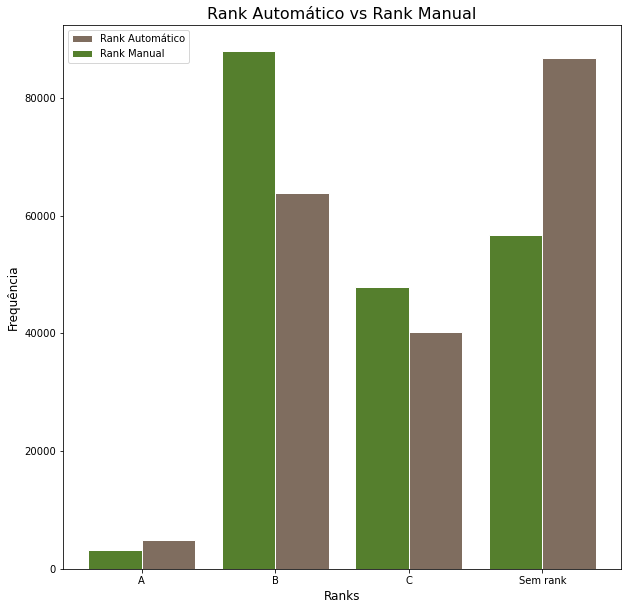

In [38]:
plt.figure(figsize=(10,10))
# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = df_rank_automatico["rank_automatico"].value_counts().sort_index()
bars2 = df_rank_automatico["rank"].value_counts().sort_index()
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1 + 0.2, bars1, color='#7f6d5f', width=0.4, edgecolor='white', label='Rank Automático')
plt.bar(r1 - 0.2, bars2, color='#557f2d', width=0.4, edgecolor='white', label='Rank Manual')
 
# Add xticks on the middle of the group bars

plt.xticks([r for r in range(len(bars1))], ['A', 'B', 'C', 'Sem rank'])
 
# Create legend & Show graphic
plt.legend()
plt.xlabel("Ranks", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.title("Rank Automático vs Rank Manual", fontsize=16)
plt.show()

In [39]:
is_equal = []
df_rank_automatico.reset_index(inplace=True)
for i in range(len(df_rank_automatico)):
    if df_rank_automatico.loc[i, "rank"] == df_rank_automatico.loc[i, "rank_automatico"]:
        is_equal.append(True)
    else:
        is_equal.append(False)

In [40]:
round((sum(is_equal) / len(df_rank_automatico))*100,2)

65.56

## 65.56 %
### Essa é a acertividade do rankeamento manual.

#### Percebe-se que os funcionários são pouco acertivos ao preencher os ranks. Recomenda-se automatizar o rankeamento para reduzir erros e otimizar análises.

## Análise 4 - Analisar quantas ordens de manutencão não foram fechadas, ou seja estão abertas até Agosto de 2022.

Para as ordens serem consideradas abertas é necessário seguir as seguintes condições:
* Ter número de ordem.
* Não ter data fim.
* Tempo de manutenção = 0.
* Tempo real = 0.

In [41]:
mask1 = ~df["n_ordem"].isna()
mask2 = df["data_fim"].isna()
mask3 = df["tempo_manutencao"] == 0
mask4 = df["tempo_real"] == 0

In [42]:
df_ordens_abertas = df[(mask1) & (mask2) & (mask3) & (mask4)]

In [43]:
df_ordens_abertas.shape[0]

12969

Em 8 anos, 12969 ordens nunca foram fechadas. Recomenda-se fornecer treinamento para que os dados sejam coletados de forma mais confiável, possibilitando uma análise melhor.

In [44]:
df_ordens_abertas_ano = df_ordens_abertas.groupby(df["data_inicio"].dt.year).size()

O gráfico a seguir mostra a evolução dos anos de 2015 à 2021 no quesito de ordens abertas:

Text(0, 0.5, 'N ordens abertas')

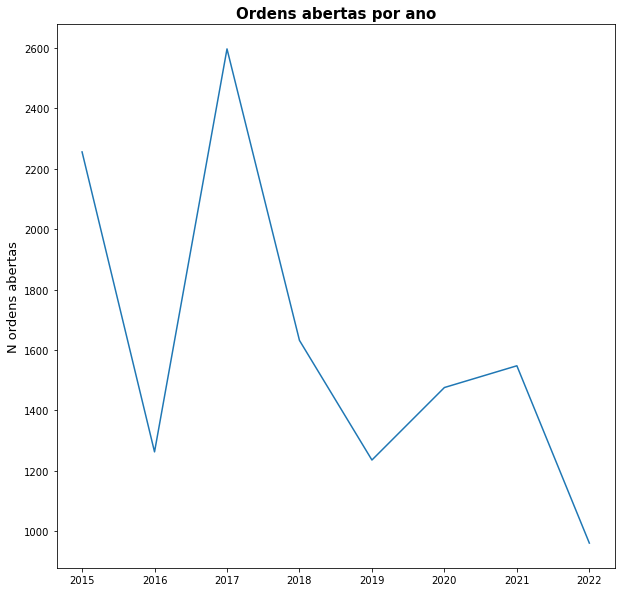

In [45]:
plt.figure(figsize=(10,10))
df_ordens_abertas_ano.plot()
plt.title("Ordens abertas por ano", fontweight="bold", fontsize=15)
plt.xlabel("")
plt.ylabel("N ordens abertas", fontsize=13)

Através da análise do gráfico, percebe-se que houve uma melhora significativa a partir de 2018 na coleta de dados.

## Análise 5 - Boxplot do tempo de manutenção por ano dos chamados concluídos.

Chamado concluído pode ser definido da seguinte maneiras:
* Ter número de ordem.
* Ter data fim.

In [46]:
mask1 = ~df["n_ordem"].isna()
mask2 = ~df["data_fim"].isna()
df_chamados_concluidos = df[(mask1) & (mask2)]

O boxplot a seguir representa os dados sem nenhum filtro de tempo de manutenção.

Text(0, 0.5, 'Tempo de manutenção (min)')

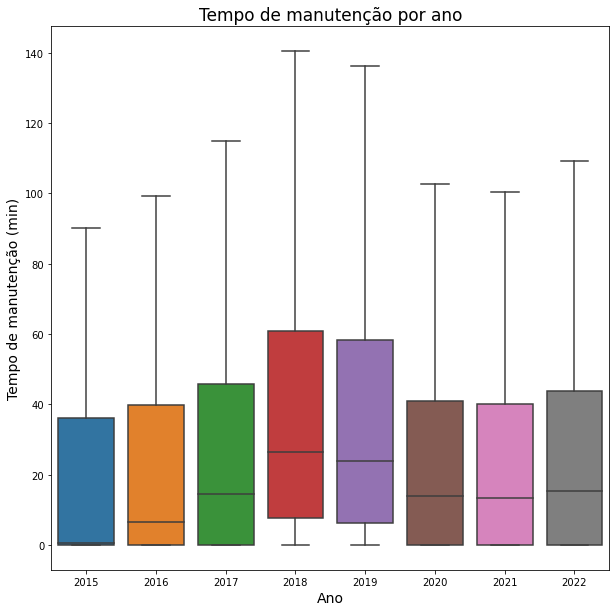

In [47]:
plt.figure(figsize=(10,10))
sns.boxplot(x= df_chamados_concluidos["data_inicio"].dt.year, y= df_chamados_concluidos["tempo_manutencao"], showfliers=False)
plt.title("Tempo de manutenção por ano", fontsize=17)
plt.xlabel("Ano", fontsize=14)
plt.ylabel("Tempo de manutenção (min)", fontsize=14)

Como pode-se observar, a maior parte dos dados (mais de 25%) estão com tempo de manutenção igual a zero, com excessão apenas dos anos de 2018 e 2019, e com destaque para 2015, que o número de manutenções com 0 minutos chega quase a 50%. Isso demonstra um erro de coleta de dados, uma vez que não faz sentido uma manutenção durar 0 minutos, e uma necessidade latente de realizar treinamentos afim de garantir dados confiáveis para melhorar a qualidade das análises.

Vale ressaltar que os outliers eram muito representativos e distantes do resto dos dados, portanto eles foram excluídos para essa análise, uma vez que distorciam muito o gráfico dificultando sua interpretação.

In [48]:
mask3 = df_chamados_concluidos["tempo_manutencao"] < df_chamados_concluidos["tempo_manutencao"].quantile(0.98)
mask4 = df_chamados_concluidos["tempo_manutencao"] > 0
df_chamados_concluidos = df_chamados_concluidos[(mask3) & (mask4)]

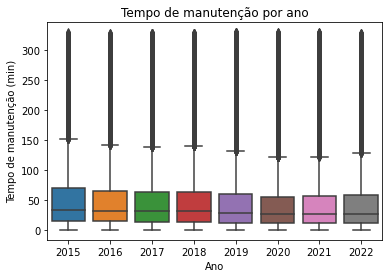

In [49]:
sns.boxplot(x= df_chamados_concluidos["data_inicio"].dt.year, y= df_chamados_concluidos["tempo_manutencao"])
plt.title("Tempo de manutenção por ano")
plt.xlabel("Ano")
plt.ylabel("Tempo de manutenção (min)");

O boxplot construído acima foi realizado com filtros na coluna tempo_manutenção. Através dos filtros foram retirados todos os tempos iguais a 0 e os 2% de tempos mais elevados. A partir de dessa análise podemos perceber que de formar consistente 75% das manutenções são realizadas em torno de 60 minutos de forma consistente ao decorrer dos anos, e que a mediana do tempo teve uma tendência de queda, além do que os outliers se mantiveram consistentes a partir dos 150 minutos.

In [50]:
df_chamados_concluidos.groupby(df["data_inicio"].dt.year)["tempo_manutencao"].describe().astype(int)

,count,mean,std,min,25%,50%,75%,max
data_inicio,,,,,,,,
2015,9704,53,59,0,14,32,69,329
2016,11484,52,58,0,15,31,65,327
2017,15395,50,57,0,13,31,63,328
2018,24259,50,56,0,13,31,63,328
2019,28745,47,54,0,12,28,60,329
2020,20574,44,53,0,11,25,55,328
2021,24006,45,53,0,11,25,55,329
2022,13427,46,54,0,12,26,58,328


À cima pode-se observar uma tabela contendo a média, mediana e os 75% dos dados. Como pode-se perceber, e como foi citado anteriormente, 75% das manutenções ocorrem em até 60 minutos no decorrer dos anos.

## Análise 6 - Evolução do custo anual de manutenção dos chamados concluídos, comparando com o a mesma evolução considerando o dataset inteiro.

Para essa análise, decidimos separar e comparar as informações do dataset inteiro vs. as informações apenas das ordens concluídas. O ano de 2022 também foi excluído da análise, visto que só há informações até agosto.

In [51]:
mask1 = ~df["n_ordem"].isna()
mask2 = ~df["data_fim"].isna()
mask3 = df["data_inicio"].dt.year != 2022
df_chamados_concluidos = df[(mask1) & (mask2) & (mask3)]
df_concluidos_total = df_chamados_concluidos.groupby(df_chamados_concluidos["data_inicio"].dt.year)["custo_de_pecas"].sum().rename("custo_manutencoes_concluidas").to_frame()
df_total = df.groupby(df[df["data_inicio"].dt.year != 2022]["data_inicio"].dt.year)["custo_de_pecas"].sum().rename("custo_total").to_frame()
df_tudo = pd.concat([df_concluidos_total, df_total], axis=1)

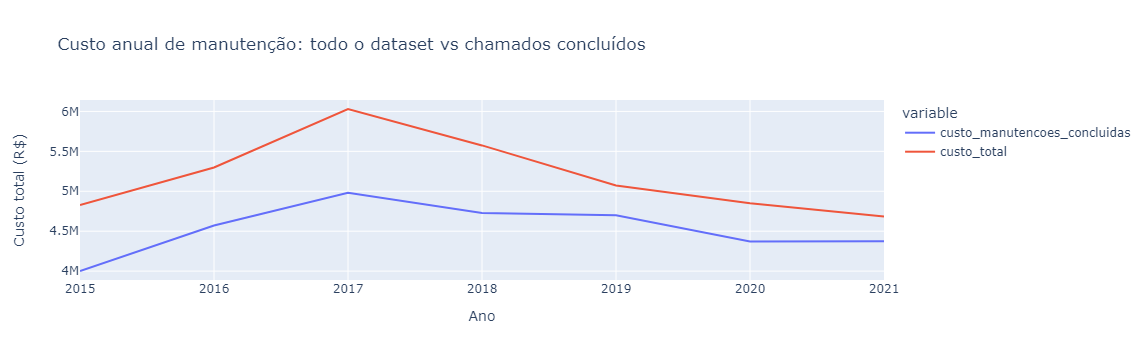

In [52]:
fig = px.line(data_frame=df_tudo, x=df_tudo.index, y= ["custo_manutencoes_concluidas", "custo_total"], title="Custo anual de manutenção: todo o dataset vs chamados concluídos")#, barmode= "group")
fig.update_layout(xaxis_title="Ano", yaxis_title="Custo total (R$)")
fig.show()

Percebemos, portanto, que apesar de ordens estarem abertas até a data que o dado foi coletado, elas ainda geram custo de manutenção relevante no dataframe. Os custos de manutenção tiveram queda expressiva a partir do ano de 2018.

## Análise 7 - Definir a taxa de chamada manutenção vs ordens de atendimento.

Foi considerado na análise apenas os anos concluídos.

In [53]:
mask1 = df["data_inicio"].dt.year != 2022
df_chamadas = df[mask1].groupby(df["data_inicio"].dt.year).agg({"n_nota": "size", "n_ordem": "count"}).reset_index()

In [54]:
df_chamadas.rename(columns={"data_inicio": "ano", "n_nota": "chamadas", "n_ordem": "atendimentos"}, inplace=True)

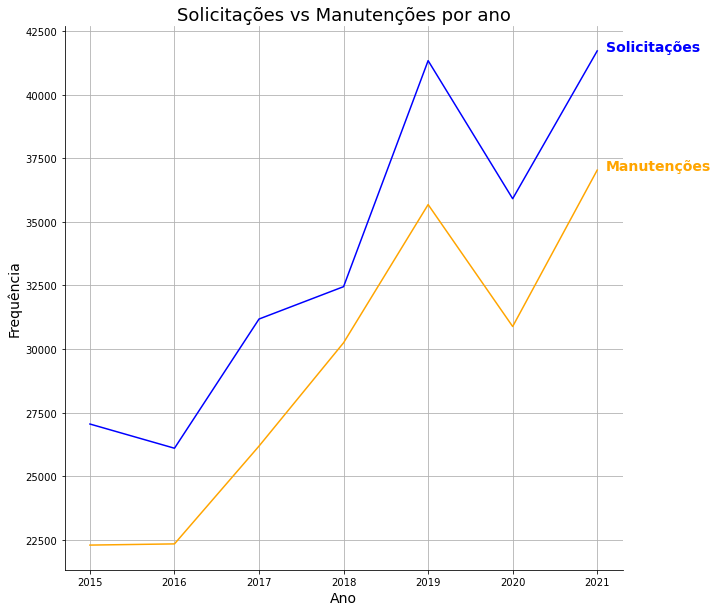

<Figure size 720x720 with 0 Axes>

In [55]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
plt.figure(figsize=(10,10))
ax.plot(df_chamadas["ano"], df_chamadas["chamadas"], c="b")
ax.plot(df_chamadas["ano"], df_chamadas["atendimentos"], c="orange")
ax.text(2021 + 0.1, df_chamadas["chamadas"].tail(1), "Solicitações", c="b", weight="bold", fontsize=14)
ax.text(2021 + 0.1, df_chamadas["atendimentos"].tail(1), "Manutenções", c="orange", weight="bold", fontsize=14)
ax.grid()
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_title("Solicitações vs Manutenções por ano", fontsize=18)
ax.set_ylabel("Frequência", fontsize=14)
ax.set_xlabel("Ano", fontsize=14);

A partir do gráfico gerado acima, percebe-se que o número de chamadas de manutenção e o número de manutenções tem uma tendência crescente com os anos. Além disso pode-se observar uma queda expressiva dos chamados de manutenção no ano de 2020, que pode ser explicada pela pandemia de Covid-19, uma vez que a indústria permaneceu fechada por 45 dias.

Outra observação que pode ser feita é que o número de chamados de manutenção e de atendimentos sempre permanecem a uma distância constante. Essa distância pode ser explicada pelo motivo do funcionário abrir mais de uma solicitação de manutenção para o mesmo problema, com o objetivo de ser atendido "mais rápido".

In [56]:
df_chamadas["porcentagem"] = ((df_chamadas.atendimentos / df_chamadas.chamadas)*100).round(2)

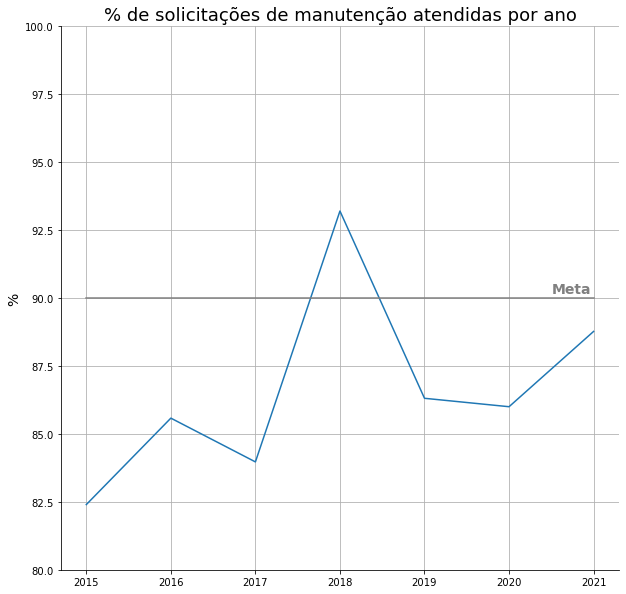

In [57]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
ax.plot(df_chamadas["ano"], df_chamadas["porcentagem"])
ax.plot(df_chamadas["ano"], [90]*len(df_chamadas["ano"]), c= "grey")
ax.text(2020.5, 90.2, "Meta", c="grey", weight="bold", fontsize=14)
ax.set_ylim([80,100])
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_title("% de solicitações de manutenção atendidas por ano", fontsize=18)
ax.grid()
ax.set_ylabel("%", fontsize=14);

### 2018 foi o ano que a maior quantidade de solicitações de manutenção foi atendida.

# Regressão Linear
### A regressão linear tentar prever o tempo de manutenção da máquina utilizando a consequência e o equipamento que está recebendo a manutenção.
#### Para essa regressão foi considerado que o tempo de manutenção no dataframe tinha que ser maior que 0 (uma vez que não podem existir manutenções com tempo 0) e menores que 98% dos maiores valores do dataset, visto que esses são outliers. Também removemos todas as consequências diferentes de 1 a 3, visto que só essas que são reais.

In [58]:
mask1 = df["tempo_manutencao"] > 0
mask2 = df["tempo_manutencao"] < df["tempo_manutencao"].quantile(0.98)
mask3 = df["consequencia"] < 4
df_reg = df[(mask1) & (mask2) & (mask3)]
df_reg["consequencia"] = df_reg["consequencia"].astype(str)

#### Como pode-se observar abaixo, mais de 25% dos equipamentos tiveram apenas 11 manutenções ou menos em 8 anos. Com o intuito de aumentar a acertividade nos equipamentos mais críticos, foi definido como mínimo de manutenções 442.

In [59]:
df_reg["equipamento"].value_counts().describe()

count     258.000000
mean      570.058140
std       695.228082
min         1.000000
25%        11.000000
50%       442.500000
75%       682.000000
max      3094.000000
Name: equipamento, dtype: float64

In [60]:
equipamentos = []
for i in range(df_reg["equipamento"].nunique()):
    if (df_reg["equipamento"].value_counts() > 441)[i]:
        equipamentos.append(df_reg["equipamento"].value_counts().index[i])

In [61]:
len(equipamentos)

130

In [62]:
df_reg["equipamentos_excluir"] = df["equipamento"].apply(lambda x: True if x in equipamentos else False)

In [63]:
mask4 = df_reg["equipamentos_excluir"] == True
df_reg = df_reg[mask4]
df_reg.drop(columns="equipamentos_excluir", inplace=True)

## Definindo a Baseline

In [64]:
y_mean = df_reg["tempo_manutencao"].mean()
y_pred_mae = [y_mean] * len(df_reg)
y_baseline = mean_absolute_error(df_reg["tempo_manutencao"], y_pred_mae)
print(y_baseline)

37.61971818059113


### A baseline do modelo é de 37.61 minutos

## Train_test_split

In [65]:
X = df_reg[["consequencia", "equipamento"]]
y = df_reg["tempo_manutencao"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Definindo o modelo e fitando:

In [66]:
model = make_pipeline(OneHotEncoder(use_cat_names=True), Ridge())
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['consequencia', 'equipamento'],
                               use_cat_names=True)),
                ('ridge', Ridge())])

## Verificando o MAE

In [67]:
mean_absolute_error(y_train, model.predict(X_train))

37.12265192239362

### O modelo bate a Baseline

In [68]:
mean_absolute_error(y_test, model.predict(X_test))

37.16089836627806

In [69]:
def make_prediction(consequencia, equipamento):
    data = {
        "consequencia": consequencia,
        "equipamento": equipamento,
    }
    df = pd.DataFrame(data, index=[0])
    prediction = model.predict(df)
    return f"O equipamento levará {prediction[0]:.2f} minutos para ficar pronto da manutenção"

In [70]:
interact(
    make_prediction,
    consequencia=Dropdown(options=sorted(X_train["consequencia"].unique())),
    equipamento=Dropdown(options=sorted(X_train["equipamento"].unique())),
);

interactive(children=(Dropdown(description='consequencia', options=('1', '2', '3'), value='1'), Dropdown(descr…